# review_ML/DL

* 다음의 데이터를 이용하여 모델링 복습을 해 봅시다.
    * 데이터와 기본 라이브러리만 작성되어 있습니다.
    * 전처리와 모델링의 틀을 제공합니다.
    * 여러분이 가장 자신 있는 알고리즘을 이용하여 모델링하시오.
        * 가능하다면 튜닝도 시도하시오.
    * 성능 평가를 합니다.

## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Duration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


* Target : Creditability
* 숫자형변수 : Duration, CreditAmount, Age
* 범주형변수 : 나머지

In [13]:
data.columns

Index(['Creditability', 'AccountBalance', 'Duration', 'Payment', 'Purpose',
       'CreditAmount', 'Employment', 'SexMarital', 'CurrentAddress',
       'MostValuableAsset', 'Age', 'Apartment', 'CreditCount', 'Occupation',
       'Dependents', 'Telephone', 'ForeignWorker'],
      dtype='object')

## 2.데이터 준비


### 1) x, y로 나누기 

In [5]:
target = 'Creditability'

x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2) 가변수화

In [17]:
 ## 더 좋은 방법
 cols_num = ['Duration','CreditAmoubt','Age']
 cols_cat = [x for x in list(x) if x not in cols_num]

In [18]:
pd.get_dummies(data, columns=cols_cat, drop_first=True)

,Creditability,Duration,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Purpose_1,Purpose_2,...,Apartment_3,CreditCount_2,CreditCount_3,CreditCount_4,Occupation_2,Occupation_3,Occupation_4,Dependents_2,Telephone_2,ForeignWorker_2
0,1,24,28,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,9,22,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,18,21,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,24,44,0,0,0,0,1,1,0,...,1,1,0,0,0,0,1,1,1,0
4,1,12,55,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12,35,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
996,1,42,45,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
997,0,54,58,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
998,1,15,50,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


### 3) train : validation 분할

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)

### 4) 스케일링

In [32]:
#### 참고

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.fit_transform(x_val)

In [20]:
min_x, max_x = x_train.min(), x_train.max()

x_train = (x_train-min_x)/(max_x-min_x)
x_val = (x_val-min_x)/(max_x-min_x)

## 3.모델링
* 최소 3가지의 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도하시오.
* validation 셋으로 예측결과를 저장하시오.

In [26]:
# 사용될 라이브러리, 함수 로딩
## 분류
from sklearn.model_selection import cross_val_score
result = {}


### 1) 모델1

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier()

In [24]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
val_score = cross_val_score(model, x_train, y_train, cv= 15, scoring="accuracy")

In [58]:
result["RandomForestClassifier"] = val_score.mean()

### 2) 모델2

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [90]:
param = {'n_neighbors':range(3, 100, 2), 'metric' : ['manhattan', 'euclidean']}

model_dt = KNeighborsClassifier()

model = GridSearchCV(model_dt ,
                           param,
                           cv = 5,
                           )

In [85]:
model.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(3, 100, 2)})

In [86]:
model.best_params_

{'metric': 'manhattan', 'n_neighbors': 9}

In [87]:
model.best_score_

0.74375

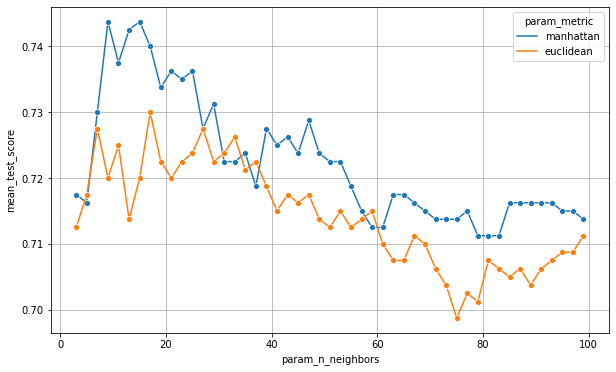

In [88]:
res = pd.DataFrame(model.cv_results_)

plt.figure(figsize = (10, 6))
sns.lineplot(x='param_n_neighbors', y = 'mean_test_score', data = res,
             marker = 'o', hue = 'param_metric')
plt.grid()
plt.show()

In [67]:
result["KNeighborsClassifier"] = model.best_score_

### 3) 모델3

In [59]:
from xgboost import XGBClassifier

In [94]:
params = {'learning_rate':np.linspace(0.01, 0.5, 50), 'n_estimators':[150]}

model4 = GridSearchCV(XGBClassifier(), params, cv = 10, verbose = 2)
model4.fit(x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.02, n_estimators=150; total time=   0.2s
[CV] END ...............learning_rate=0.02, n_

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                         'n_estimators': [150]},
             verbose=2)

In [95]:
res = pd.DataFrame(model4.cv_results_)

plt.figure

### 4) 모델4

In [ ]:
from sklearn.svm import SVC

params = {'C' : [1, 10, 20, 30], }

### 5) 모델5

In [93]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

pred3 = model3.predict(x_val)

## 4.모델 성능 비교
* 모델 중 성능이 가장 좋은 모델은?